In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
    

In [2]:

# Load the dataset
import os
# Define the relative path to go up one directory and access dataset.csv
file_path = os.path.join(os.getcwd(), '..', 'dataset.csv')

selected_columns = ['sub', 'act', 'alx', 'aly', 'alz']
data = pd.read_csv(file_path, usecols=selected_columns)
print(f"Dataset loaded successfully from {file_path}")

Dataset loaded successfully from c:\ubuntu\human_activity_recognition\Experiment\..\dataset.csv


In [3]:

# Rename columns
data.rename(columns={'act': 'activity', 'sub': 'subject'}, inplace=True)
print("Columns renamed: 'act' -> 'activity', 'sub' -> 'subject'")
    

Columns renamed: 'act' -> 'activity', 'sub' -> 'subject'


In [4]:

# Remove duplicate rows
before_count = len(data)
data = data.drop_duplicates()
after_count = len(data)
print(f"Removed {before_count - after_count} duplicate rows. Remaining rows: {after_count}.")
    

Removed 71 duplicate rows. Remaining rows: 32531.


In [5]:

# Handle missing values by removing rows with NaN in 'subject' or 'activity' columns
required_columns = ['subject', 'activity']
data = data.dropna(subset=required_columns)
print("Rows with NaN in 'subject' or 'activity' columns have been removed.")
    

Rows with NaN in 'subject' or 'activity' columns have been removed.


In [6]:

# Handle missing values for other columns using the mean strategy
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].mean())
print("Missing values handled using mean strategy.")
    

Missing values handled using mean strategy.


In [7]:

# Fix incorrect datatypes
print("---------------------------------------Before fixing the datatypes------------------------")
print(data.dtypes)
data['subject'] = data['subject'].astype('string')
print("Column 'subject' converted to string.")
print("---------------------------------------After fixing the datatypes------------------------")
print(data.dtypes)
    

---------------------------------------Before fixing the datatypes------------------------
alx         float64
aly         float64
alz         float64
activity     object
subject      object
dtype: object
Column 'subject' converted to string.
---------------------------------------After fixing the datatypes------------------------
alx                float64
aly                float64
alz                float64
activity            object
subject     string[python]
dtype: object


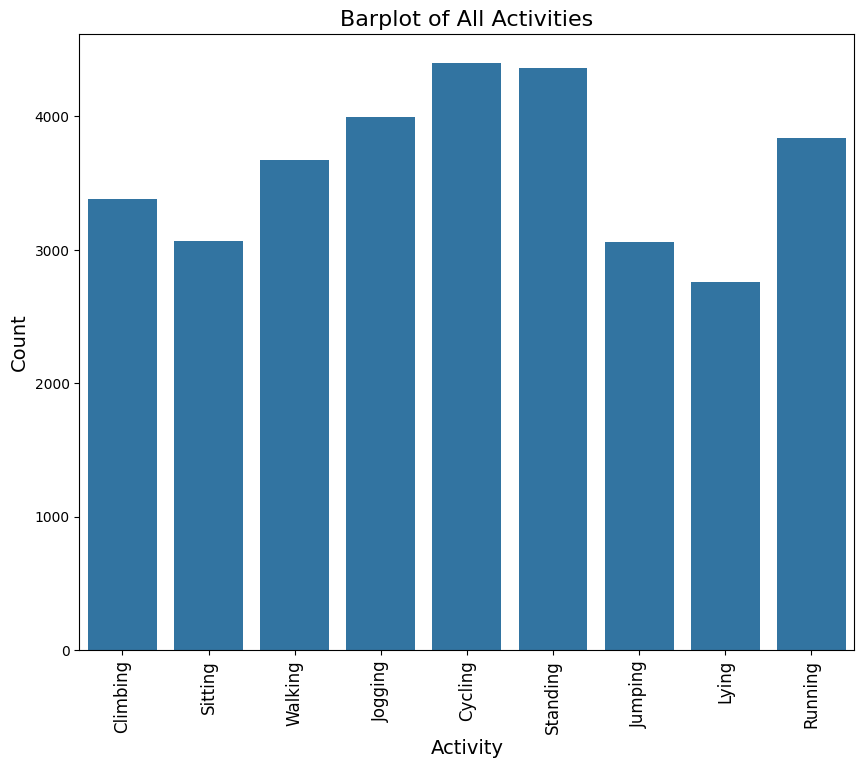

In [8]:

# Plot the distribution of all activities
plt.figure(figsize=(10, 8))
plt.title("Barplot of All Activities", fontsize=16)
sns.countplot(data=data, x='activity')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
    

In [9]:

# Filter selected activities
selected_activities = ["Jogging", "Walking", "Jumping", "Cycling", "Sitting"]
data = data[data['activity'].isin(selected_activities)]
data['activity'] = data['activity'].apply(lambda x: x if x in selected_activities else "0")
activity_counts = data['activity'].value_counts()
print(f"Counts of selected activities:{activity_counts}")
    

Counts of selected activities:activity
Cycling    4398
Jogging    3993
Walking    3671
Sitting    3064
Jumping    3061
Name: count, dtype: int64


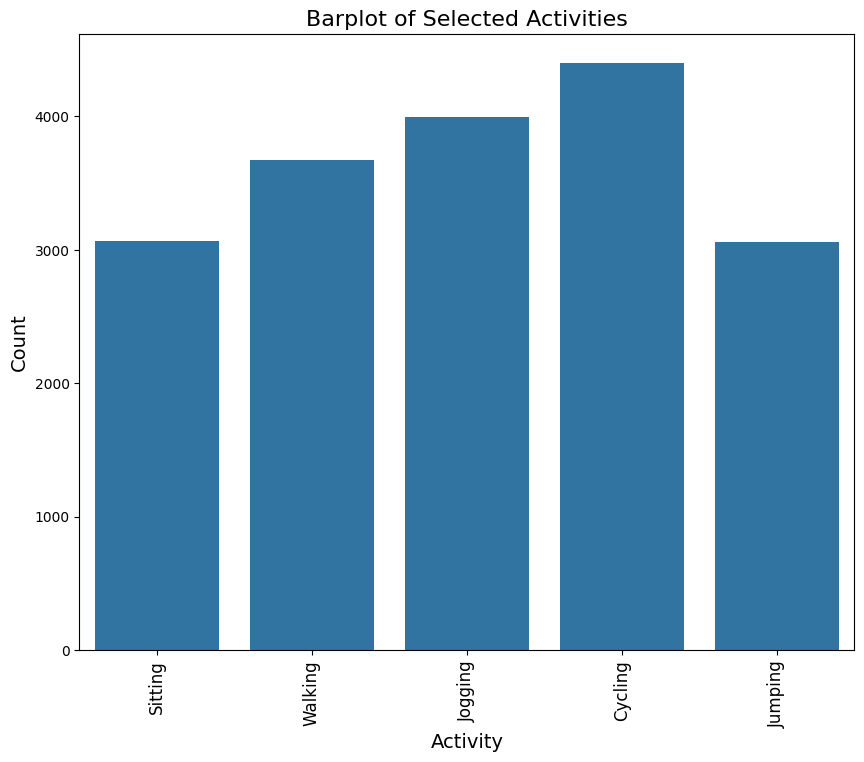

In [10]:

# Plot the distribution of selected activities
plt.figure(figsize=(10, 8))
plt.title("Barplot of Selected Activities", fontsize=16)
sns.countplot(data=data, x='activity')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
    

In [11]:

# Encode categorical data
le = LabelEncoder()
data['activity'] = le.fit_transform(data['activity'])
    

In [12]:

# Split the dataset into features and labels
X = data.drop(columns=['activity', 'subject'])  # Drop 'subject' as well
y = data['activity']
    

In [13]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Dataset split into training and testing sets. Test size: 0.2")
    

Dataset split into training and testing sets. Test size: 0.2


In [14]:

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features scaled successfully.")
    

Features scaled successfully.


In [15]:

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")
    

Logistic Regression model trained successfully.


In [16]:

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Accuracy: 62.92%
Confusion Matrix:
[[721  31   0 136   0]
 [537 154  71  43   0]
 [ 99  65 288  89  62]
 [145   0   0 463   0]
 [  0   0   0  71 663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.81      0.60       888
           1       0.62      0.19      0.29       805
           2       0.80      0.48      0.60       603
           3       0.58      0.76      0.66       608
           4       0.91      0.90      0.91       734

    accuracy                           0.63      3638
   macro avg       0.68      0.63      0.61      3638
weighted avg       0.67      0.63      0.60      3638

